## Get Song

In [1]:
import requests
import re
from bs4 import BeautifulSoup
import urllib.request as urllib2
import pandas as pd
from unidecode import unidecode

In [2]:
def GetSong(SingerID = 45129):
    url = 'https://music.163.com/artist?id=' + str(SingerID)
    
    page = urllib2.urlopen(url)
    
    soup = BeautifulSoup(page,'html.parser')
    
    hotsong_list = soup.find(id='hotsong-list')

    hotsong_list = hotsong_list.find_all('ul')

    content = str(hotsong_list[0])

    content1 = content.replace('</a></li>','\n')

    content2 = re.findall(r'id=(.+)">(.+)',content1)
    
    Id2Song = {int(x[0].strip()):re.sub(u"\\(.*?\\)|\\{.*?}|\\[.*?]", "", x[1].strip() ).strip()for x in content2}
    
    Song2Id = {}
    for id in Id2Song:
        song = Id2Song[id]
        if song in Song2Id:
            continue
        else:
            Song2Id[song] = id
    return Id2Song,Song2Id

In [3]:
Id2Song,Song2Id = GetSong()

In [4]:
Song2Id

{'There For You': 480426313,
 'for him.': 37955044,
 'YOUTH': 36668810,
 'Strawberries &amp; Cigarettes': 544247584,
 'BLUE': 37955047,
 "i'm so tired...": 1339216146,
 'FOOLS': 34383213,
 '1999': 1314780499,
 'WILD': 418550450,
 'LOST BOY': 37988002,
 'My My My!': 542679120,
 'EASE': 441107979,
 'TALK ME DOWN': 35437414,
 'SUBURBIA': 37955045,
 'HEAVEN': 37857000,
 'Somebody To Love': 1322195253,
 'for him': 419254976,
 'Happy Little Pill': 28850248,
 'Someone Like You': 36496637,
 'There for You': 493276825,
 'Touch': 28947006,
 'SWIMMING POOLS': 37988124,
 'COOL': 37988001,
 'Fun': 28947007,
 'BITE': 35448203,
 'Bloom': 556204150,
 'Papercut': 32019009,
 'Revelation': 1318571311,
 'Youth': 414670127,
 'Gasoline': 28947008,
 'The One That Got Away': 34200871,
 'Dance To This': 573240010,
 'Seventeen': 1305364095,
 'Hands to Myself &amp; Sorry': 420134159,
 'Lucky Strike': 1305366110,
 'Animal': 1299557768,
 'The Good Side': 531623073,
 'The Fault In Our Stars': 28947009,
 'HAPPY LITT

## Get Lyrics

In [17]:
zh_pattern = re.compile(u'[\u4e00-\u9fa5]+')

In [20]:
def get_lyric(Songid):
    url = 'http://music.163.com/api/song/lyric?id=' + str(Songid)+ '&lv=1&kv=1&tv=-1'
    page = urllib2.urlopen(url)
    
    soup = BeautifulSoup(page,'html.parser')
    
    content = str(soup).replace('‘|’',"'").replace('“|”',"\"").replace(r'\\n','\n')

    content1 = re.findall('\[\d\d:.+]',content)[0].split(r'\n')



    lyrics = [re.findall('\[.+\](.+)',x) for x in content1 if len(re.findall('\[.+\](.+)',x)) > 0 and not zh_pattern.search(x)]

    lyric = ''
    for sent in lyrics:
        sent = str(sent).replace('[','').replace(']','').replace('"',"").strip("'")
        lyric = lyric + sent + '.'
    return lyric

In [202]:
lyric.split('.')[0].split(' ')

["'We", 'are', "runnin'", 'so', "fast'"]

In [21]:
get_lyric(37955047)

"Love it's hard, I know.All your lights are red, but I'm green to go.Used to see you high, now you're only low.All your lights are red but I'm green to go.I want you.I'll colour me blue.Anything it takes to make you stay.Only seeing myself.When I'm looking up at you.I want you.I'll colour me blue.Anything it takes to make you stay.Only seeing myself.When I'm looking up at you.I can't say no.Though the lights are on.There's nobody home.Swore I'd never lose control.Then I fell in love with a heart that beats so slow.I want you.I'll colour me blue.Anything it takes to make you stay.Only seeing myself.When I'm looking up at you.I want you.I'll colour me blue.Anything it takes to make you stay.Only seeing myself.When I'm looking up at you.I know you're seeing black and white.So I'll paint you a clear blue sky.Without you I am colour-blind.It's raining every time I open my eyes.I know you're seeing black and white.So I'll paint you a clear blue sky.Without you I am colour-blind.It's raining 

## Save To CSV

In [27]:
import csv
import pandas as pd

In [28]:
def save_to_csv(filename):
    with open(filename,'w',encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Song','SongID','Lyric'])
        for id in Id2Song:
            song = Id2Song[id]
            Lyric = get_lyric(id)
            writer.writerow([song,id,Lyric])

In [29]:
save_to_csv('Troye.csv')

In [25]:
data = pd.read_csv('test.csv')

In [26]:
data.head(10)

,Song,SongID,Lyric
0,There For You,480426313,"I woke up pissed off today.And lately, everyon..."
1,for him.,37955044,We are runnin' so fast.And we never look back....
2,YOUTH,36668810,"What if, what if we run away?.What if, what if..."
3,Strawberries &amp; Cigarettes,544247584,Remember when we first met?.You said “light my...
4,BLUE,37955047,"Love it's hard, I know.All your lights are red..."
5,i'm so tired...,1339216146,I’m so tired of love songs.Tired of love songs...
6,FOOLS,34383213,"I am tired of this place, I hope people change..."
7,1999,1314780499,"I just wanna go back, back to 1999.Took a ride..."
8,WILD,418550450,Trying hard not to fall.On the way home.You we...
9,LOST BOY,37988002,"As the smile fell from your face, I fell with ..."


## Analyse

In [36]:
mytext = data.Lyric[0]

In [37]:
from wordcloud import WordCloud

(-0.5, 599.5, 799.5, -0.5)

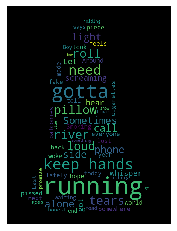

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
backimage = plt.imread('picture.jpg')
wordcloud = WordCloud(mask=backimage).generate(mytext)
plt.imshow(wordcloud)
plt.axis('off')

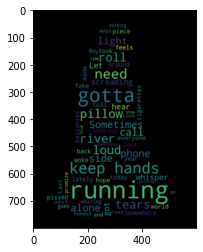

In [48]:
plt.imshow(wordcloud,interpolation='bilinear')